Hey Guys! This project is about Spam Email Classifier. I have used the free datasets from Kaggle.

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud


Let's start by importing the data first and see how the data looks like.

In [34]:
import pandas as pd
data = pd.read_csv("spam.csv")
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Lets see how many the spam and the ham datas are.
We are doing this so that we could know about the variance of the datasets. To do so, lets groupby the whole datasets by 'category' column.

In [35]:
data.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

<Axes: xlabel='Category'>

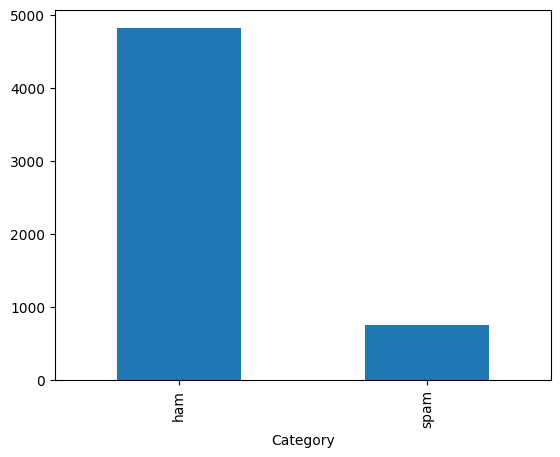

In [36]:
data['Category'].value_counts().plot.bar()

<Axes: title={'center': 'Distribution in Percentage'}>

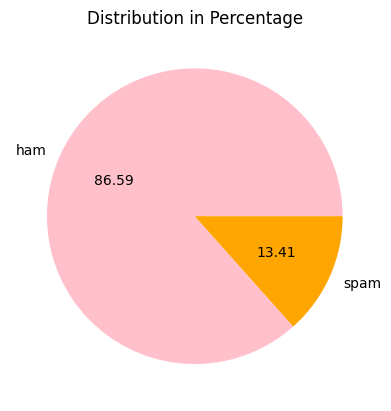

In [48]:
data.groupby('Category').size().plot(kind='pie', autopct='%.2f', colors=['pink', 'orange'], title="Distribution in Percentage")

As we can see, the data is imbalance. The number of ham emails are far greater in amount than the number of spam email. 
This could affect our model's performance. However, we are still going with this same data for experimental purpose.


We know that Machine Learning model can understand binary digits (i.e 0s and 1s). Since we have 'Message' and 'Category' column containing text, we should somehow convert this text into something(0s and 1s) that our model understands.


In [49]:
category_dummies = pd.get_dummies(data['Category'],dtype='int')
categorized_data=pd.concat([data,category_dummies],axis='columns')
categorized_data.head(10)
            

,Category,Message,ham,spam
0,ham,"Go until jurong point, crazy.. Available only ...",1,0
1,ham,Ok lar... Joking wif u oni...,1,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,1
3,ham,U dun say so early hor... U c already then say...,1,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,0,1
6,ham,Even my brother is not like to speak with me. ...,1,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,1,0
8,spam,WINNER!! As a valued network customer you have...,0,1
9,spam,Had your mobile 11 months or more? U R entitle...,0,1


First, I created dummies of the 'Category' column. Two columns namely 'ham' and 'spam' are created. Since our project is Spam Email Classifier not Ham Email Classifier, I am dropping the 'ham' column and 'Category' column.

In [50]:
categorized_data.drop(['Category','ham'],axis='columns',inplace=True)
categorized_data.head(10)

,Message,spam
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
5,FreeMsg Hey there darling it's been 3 week's n...,1
6,Even my brother is not like to speak with me. ...,0
7,As per your request 'Melle Melle (Oru Minnamin...,0
8,WINNER!! As a valued network customer you have...,1
9,Had your mobile 11 months or more? U R entitle...,1


Now, lets look at what the frequently used words are in Ham emails(real email) and Spam emails.

Here, 0 means Not spam and 1 means Spam

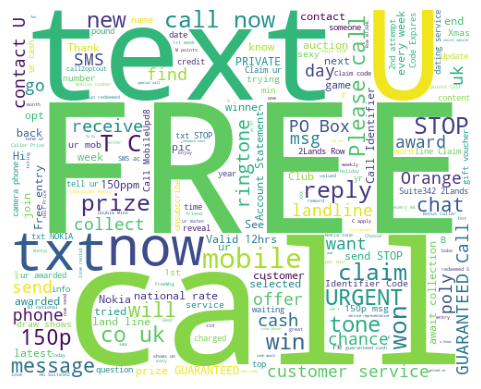

In [40]:
def visualize(n):
    words = ''
    for txt in categorized_data[categorized_data['spam'] == n]['Message']:
        words = words + txt + ' '
        
    wordcloud = WordCloud(width=500,height=400,background_color='white').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

visualize(1)

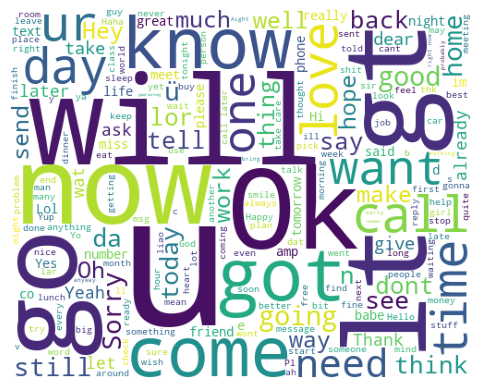

In [41]:
visualize(0)

Lets split the dataset for training and testing.

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(categorized_data['Message'],categorized_data['spam'],test_size=0.2,random_state=42)

In [43]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((4457,), (4457,), (1115,), (1115,))

In [44]:
models = [("Logistic Regression", LogisticRegression(random_state =42)),
          ("Support Vector Machine", SVC(random_state =42)),
          ("Decision Tree", DecisionTreeClassifier(random_state =42)),
          ("RandomForest", RandomForestClassifier(random_state =42)),
          ('Multinomial Naive Bayes', MultinomialNB())
         ]

Since my train and test data are still text, I need to convert them first to binary before training to the models.


Logistic Regression Cross_validation score is 0.9800

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.90      0.95       149

    accuracy                           0.99      1115
   macro avg       0.99      0.95      0.97      1115
weighted avg       0.99      0.99      0.99      1115



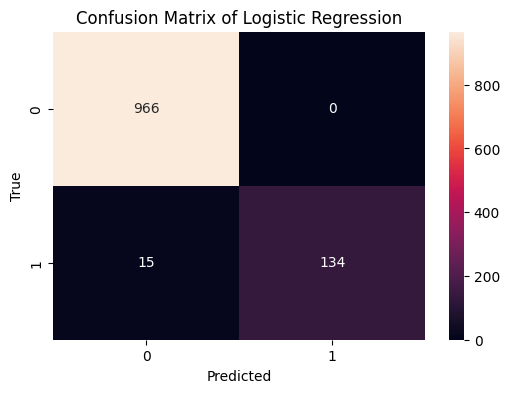


Support Vector Machine Cross_validation score is 0.9776

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115



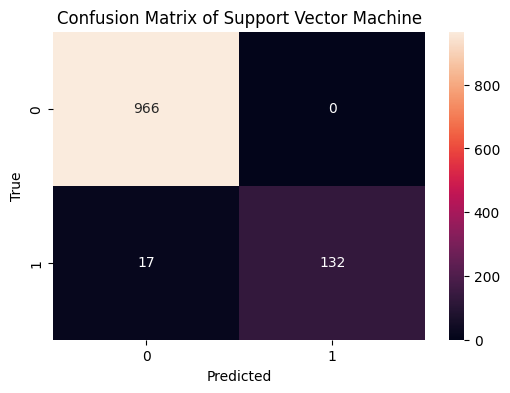


Decision Tree Cross_validation score is 0.9668

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       966
           1       0.91      0.87      0.89       149

    accuracy                           0.97      1115
   macro avg       0.94      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115



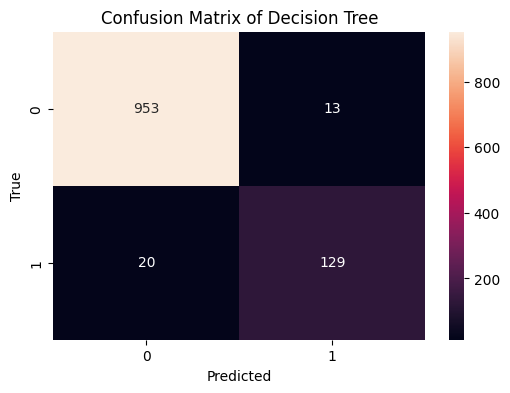


RandomForest Cross_validation score is 0.9728

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



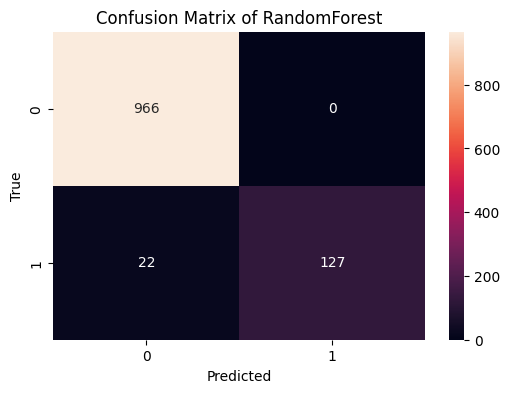


Multinomial Naive Bayes Cross_validation score is 0.9832

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       966
           1       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



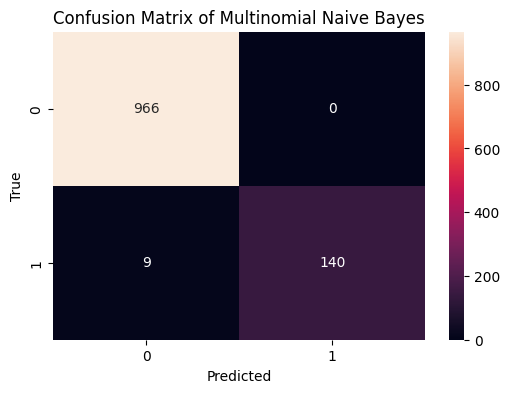

In [45]:
for name,model in models:
    pipe = Pipeline([('Count Vectorizer', CountVectorizer()),
                     ("Classifier",model)])
    scores = cross_val_score(pipe,X_train,y_train,cv=5)
    print()
    print(f"{name} Cross_validation score is {scores.mean():.4f}\n")
    pipe.fit(X_train,y_train)
    y_predicted = pipe.predict(X_test)
    print(classification_report(y_test,y_predicted))
    cm = confusion_matrix(y_test,y_predicted)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm,annot=True, fmt='d')
    plt.title(f"Confusion Matrix of {name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
